In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import latent_cause as lc
#from statsrat.expr.predef.pvl_iti import import extinction, blocking, spont_rec
from statsrat.expr.predef.pvl_no_iti import extinction, blocking, spont_rec, conditioning
from statsrat.expr.predef.kitten import lrn_pred

In [2]:
model = lc.model(kernel = lc.kernel.constant)
print(model.pars)

            min   max  default  \
prior_a     2.0  40.0      2.0   
prior_b     2.0  40.0      5.0   
alpha       0.0  10.0      0.5   
resp_scale  0.0  10.0      1.0   

                                                  description  
prior_a     prior hyperparameter for eta (log-odds in Bern...  
prior_b     prior hyperparameter for eta (log-odds in Bern...  
alpha       concentration parameter; higher -> tend to inf...  
resp_scale         scales softmax/logistic response functions  


In [3]:
par_val = [4.489, 2.001, 9.999, 5.]
#par_val = [20, 2, 10, 5.]
# FIGURE OUT WHY THE OAT SCORE VALUE IS DIFFERENT HERE FROM WHEN I PERFORM THE OAT (AT LEAST WITH THE CONSTANT KERNEL).

trials = spont_rec.make_trials('experimental')
ds = model.simulate(trials, par_val)

trials_ctl = spont_rec.make_trials('control')
ds_ctl = model.simulate(trials_ctl, par_val)

print(spont_rec.oats['spontaneous_recovery'].compute_total({'experimental': ds, 'control': ds_ctl}))
print(spont_rec.oats['spontaneous_recovery'].mean_resp({'experimental': ds, 'control': ds_ctl}))

-0.17402453430518716
       schedule     trial_name u_name  mean_resp
0  experimental  cs -> nothing     us   0.770486
0       control  cs -> nothing     us   0.944511


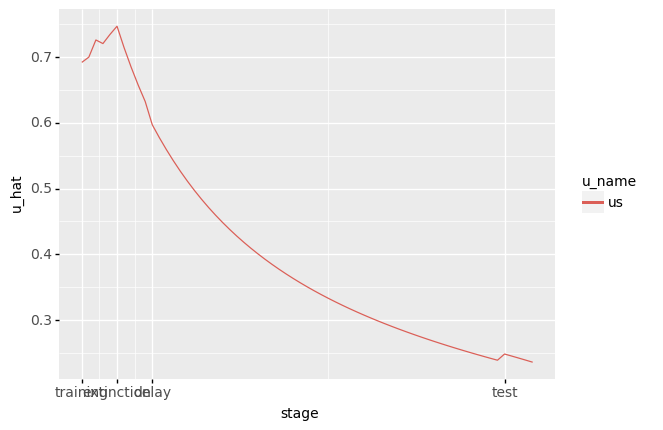

<ggplot: (286474701)>

In [4]:
sr.learn_plot(ds, var = 'u_hat')

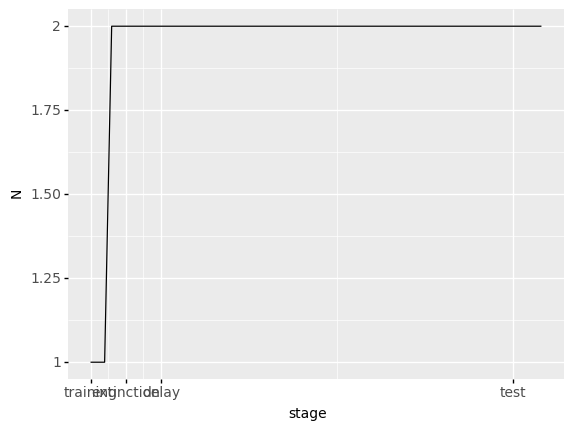

<ggplot: (310176049)>

In [5]:
sr.learn_plot(ds, var = 'N')

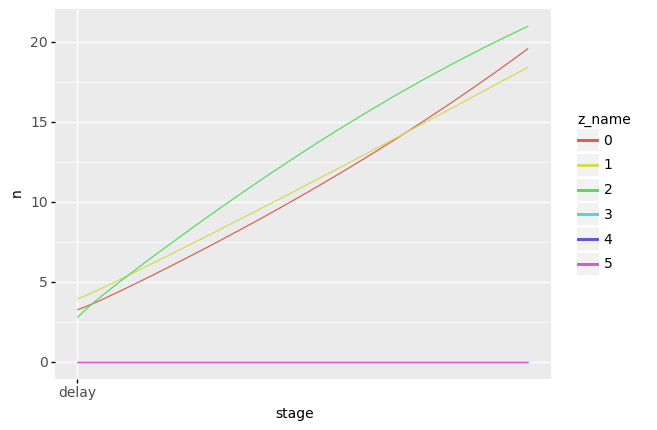

<ggplot: (310106956)>

In [6]:
sr.learn_plot(ds, var = 'n', sel = {'z_name': ['0', '1', '2', '3', '4', '5'], 't': ds['stage_name'] == 'delay'})

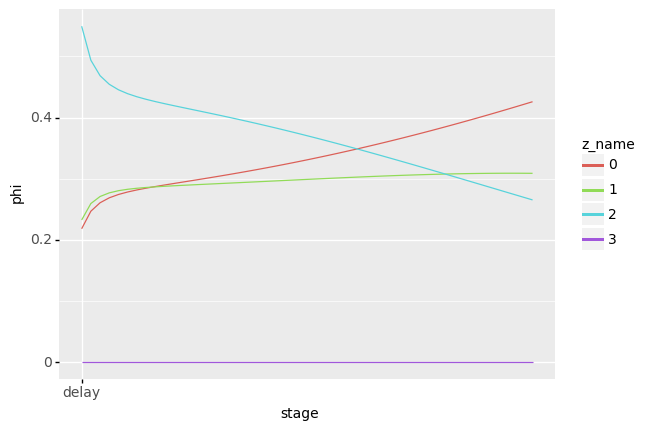

<ggplot: (310111254)>

In [7]:
sr.learn_plot(ds, var = 'phi', sel = {'z_name': ['0', '1', '2', '3'], 't': ds['stage_name'] == 'delay'})

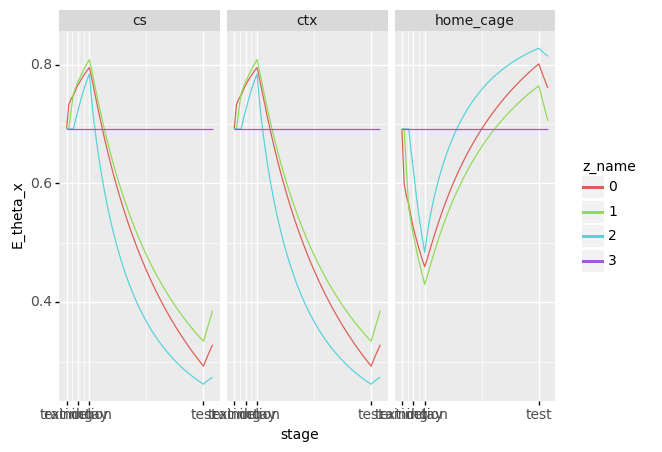

<ggplot: (310096794)>

In [8]:
sr.learn_plot(ds, var = 'E_theta_x', sel = {'z_name': ['0', '1', '2', '3']})

In [9]:
#oat_result = sr.perform_oat(model, spont_rec, verbose = False, max_time = 60, minimize = False, n = 1)
#print(np.round(oat_result[0], 3))
#print(np.round(oat_result[1], 3))

In [10]:
foo = np.arange(5)
N = 2 # this means that the "old" LCs are 0 and 1, while the "new" LC is 2
ind_n = range(N)
ind_n1 = range(N + 1)
print(foo[ind_n])
print(foo[ind_n1])
print(foo[0:1])

[0 1]
[0 1 2]
[0]
